In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import os

In [44]:
online_retail =pd.read_excel('Online Retail.xlsx')

In [45]:
df = online_retail

In [46]:
df.shape

(541909, 8)

In [47]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [48]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'].dt.strftime('%Y-%m-%d'))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [49]:
df = df[df['UnitPrice']>0]

In [50]:
df['Total_Price'] = df['Quantity']*df['UnitPrice']
grp_date = df[['Quantity','InvoiceDate','UnitPrice','Description','Total_Price']].groupby('InvoiceDate')
grp_date = grp_date.sum()

sale = grp_date[['Total_Price']]
sale.to_csv('DailySalesTrending.csv')
sale

,Total_Price
InvoiceDate,
2010-12-01,58635.56
2010-12-02,46207.28
2010-12-03,45620.46
2010-12-05,31383.95
2010-12-06,53860.18
...,...
2011-12-05,57751.32
2011-12-06,54228.37
2011-12-07,75076.22


In [51]:
df1 = pd.read_csv('DailySalesTrending.csv')

df1['InvoiceDate'] = df1['InvoiceDate'].astype('datetime64[ns]')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceDate  305 non-null    datetime64[ns]
 1   Total_Price  305 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.9 KB


In [52]:
df1.set_index(df1['InvoiceDate'],drop=False,inplace=True)

missing_date = pd.date_range(start ='2010-12-01', end ='2011-12-09').difference(df1.index)

In [53]:
df1 = df1.reindex(pd.date_range(start ='2010-12-01', end ='2011-12-09'))
df1.fillna(0,inplace=True)
df1['InvoiceDate'] = df1.index

In [54]:

df1['year'] = df1['InvoiceDate'].dt.year
df1['month'] = df1['InvoiceDate'].dt.month
df1['day'] = df1['InvoiceDate'].dt.day
df1['week'] = df1['InvoiceDate'].dt.week
df1['weekday'] = df1['InvoiceDate'].dt.weekday
df1['dayofyear'] = df1['InvoiceDate'].dt.dayofyear

In [55]:
df1.head()

,InvoiceDate,Total_Price,year,month,day,week,weekday,dayofyear
2010-12-01,2010-12-01,58635.56,2010,12,1,48,2,335
2010-12-02,2010-12-02,46207.28,2010,12,2,48,3,336
2010-12-03,2010-12-03,45620.46,2010,12,3,48,4,337
2010-12-04,2010-12-04,0.00,2010,12,4,48,5,338
2010-12-05,2010-12-05,31383.95,2010,12,5,48,6,339


In [56]:
df1.to_csv('Cleaned_Data.csv')

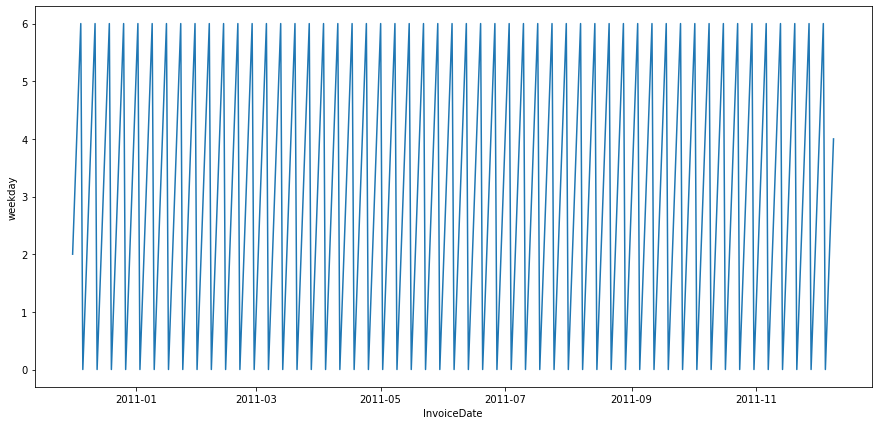

In [57]:
sns.lineplot(x='InvoiceDate', y='weekday', data = df1)

In [58]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

plot = [go.Bar(x=df1.InvoiceDate, y = df1.day)]
layout = go.Layout(yaxis={'autorange':True, 'title':'Log10 number of orders'},xaxis={'title':'month'})
fig = go.Figure(data=plot, layout=layout)
iplot(fig)

In [59]:
df4 = df1

In [60]:
df4.rename(columns={'Total_Price' : 'TotalSales'}, inplace = True)
#df4.describe()
#df4.set_index('InvoiceDate',inplace=True)

In [61]:
df4.head()

,InvoiceDate,TotalSales,year,month,day,week,weekday,dayofyear
2010-12-01,2010-12-01,58635.56,2010,12,1,48,2,335
2010-12-02,2010-12-02,46207.28,2010,12,2,48,3,336
2010-12-03,2010-12-03,45620.46,2010,12,3,48,4,337
2010-12-04,2010-12-04,0.00,2010,12,4,48,5,338
2010-12-05,2010-12-05,31383.95,2010,12,5,48,6,339


In [68]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df4['TotalSales'])
print(test_result)

(-1.951069284156362, 0.308430678684222, 13, 360, {'1%': -3.448645946352023, '5%': -2.869602139060357, '10%': -2.5710650077160495}, 7774.285841320173)


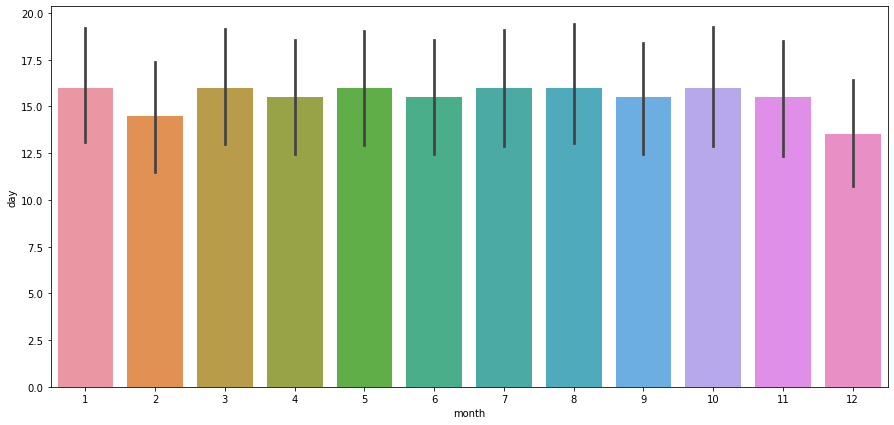

In [69]:
sns.barplot(x='month', y='day', data = df1)

In [115]:
df9 = df4.groupby('InvoiceDate')['TotalSales'].sum().reset_index()

In [116]:
df9.head()

,InvoiceDate,TotalSales
0,2010-12-01,58635.56
1,2010-12-02,46207.28
2,2010-12-03,45620.46
3,2010-12-04,0.00
4,2010-12-05,31383.95


In [117]:
df9.set_index('InvoiceDate', inplace = True)

In [118]:
df9.head()

,TotalSales
InvoiceDate,
2010-12-01,58635.56
2010-12-02,46207.28
2010-12-03,45620.46
2010-12-04,0.00
2010-12-05,31383.95


In [119]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

#if result.loc['p-value'] <= 0.05:
    #print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
#else:
    #print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df9['TotalSales'])

ADF Test Statistic : -1.951069284156362
p-value : 0.308430678684222
#Lags Used : 13
Number of Observations : 360


In [120]:
#df9['Sales First Difference'] = df9['TotalSales'] - df9['TotalSales'].shift(1)
#df9['Seasonal First Difference']=df9['TotalSales']-df9['TotalSales'].shift(365)
#df9.head()

,TotalSales,Sales First Difference,Seasonal First Difference
InvoiceDate,,,
2010-12-01,58635.56,NaN,NaN
2010-12-02,46207.28,-12428.28,NaN
2010-12-03,45620.46,-586.82,NaN
2010-12-04,0.00,-45620.46,NaN
2010-12-05,31383.95,31383.95,NaN


In [121]:
adfuller_test(df9['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.77265745255256
p-value : 0.394118490953138
#Lags Used : 2
Number of Observations : 6


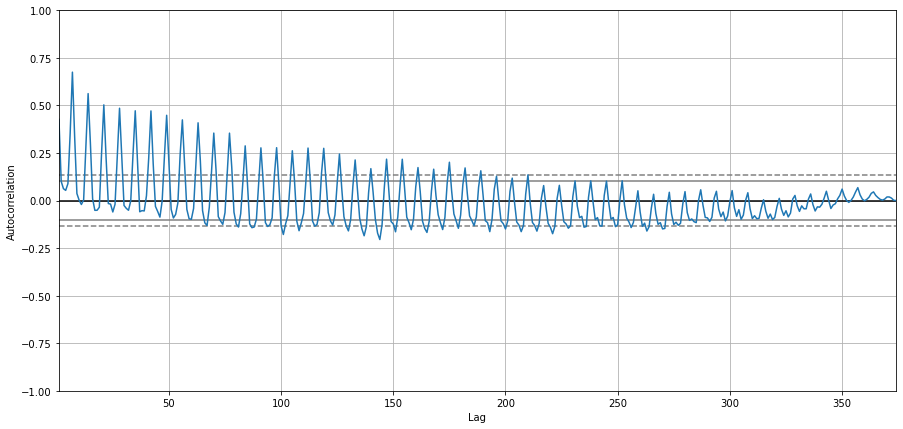

In [122]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df9['TotalSales'])
plt.show()

ValueError: operands could not be broadcast together with shapes (39,) (7,) (39,) 

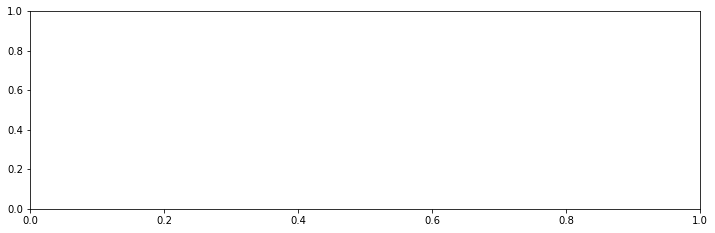

In [123]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df9['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df9['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [124]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df9['TotalSales'],order=(10,1,2))
model_fit=model.fit()
model_fit.summary()

C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.TotalSales   No. Observations:                  373
Model:                ARIMA(10, 1, 2)   Log Likelihood               -4058.671
Method:                       css-mle   S.D. of innovations          12725.634
Date:                Sun, 21 Feb 2021   AIC                           8145.342
Time:                        15:22:20   BIC                           8200.244
Sample:                    12-02-2010   HQIC                          8167.143
                         - 12-09-2011                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  28.5143    178.174      0.160      0.873    -320.700     377.729
ar.L1.D.TotalSales      0.4131      0.055      7.533      0.000       0.306       0.521
ar.L2.D.TotalSales     -0.7744      0.058    -13.464      0.000      -0.887      -0.662
ar.L3.D.TotalSales     -0.3888      0.068     -5.710      0.000      -0.522      -0.255
ar.L4.D.TotalSales     -0.4450      0.068     -6.504      0.000      -0.579      -0.311
ar.L5.D.TotalSales     -0.3949      0.071     -5.582      0.000      -0.534      -0.256
ar.L6.D.TotalSales     -0.2532      0.071     -3.582      0.000      -0.392      -0.115
ar.L7.D.TotalSales      0.2238      0.068      3.273      0.001       0.090       0.358
ar.L8.D.TotalSales     -0.4142      0.068     -6.052      0.000      -0.548      -0.280
ar.L9.D.TotalSales      0.1274      0.057      2.225      0.026       0.015       0.240
ar.L10.D.TotalSales     0.0544      0.055      0.997      0.319      -0.053       0.161
ma.L1.D.TotalSales     -1.1997      0.020    -60.267      0.000      -1.239      -1.161
ma.L2.D.TotalSales      0.9671      0.021     45.740      0.000       0.926       1.009
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0166           -0.5064j            1.1358           -0.4264
AR.2            -1.0166           +0.5064j            1.1358            0.4264
AR.3            -0.2396           -1.0412j            1.0684           -0.2860
AR.4            -0.2396           +1.0412j            1.0684            0.2860
AR.5             0.6238           -0.7823j            1.0005           -0.1429
AR.6             0.6238           +0.7823j            1.0005            0.1429
AR.7             0.6409           -1.0141j            1.1997           -0.1603
AR.8             0.6409           +1.0141j            1.1997            0.1603
AR.9             1.9911           -0.0000j            1.9911           -0.0000
AR.10           -4.3490           -0.0000j            4.3490           -0.5000
MA.1             0.6203           -0.8058j            1.0169           -0.1456
MA.2             0.6203           +0.8058j            1.0169            0.1456
------------------------------------------------------------------------------
"""

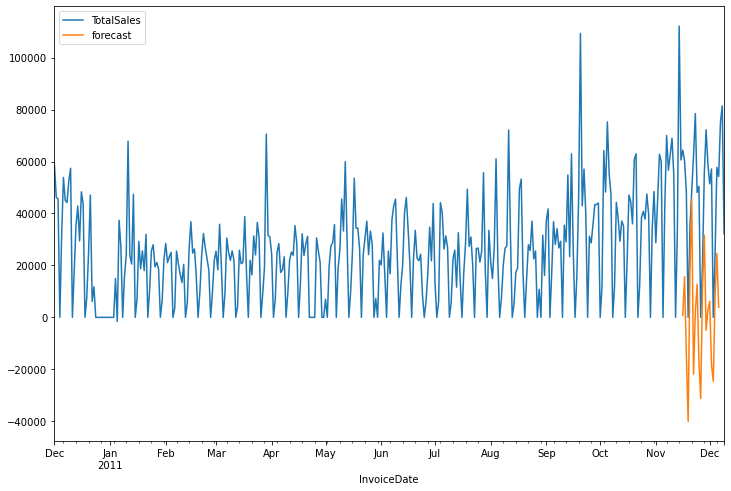

In [127]:
df9['forecast']=model_fit.predict(start=350,end=370,dynamic=True)
df9[['TotalSales','forecast']].plot(figsize=(12,8))

C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\batka\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



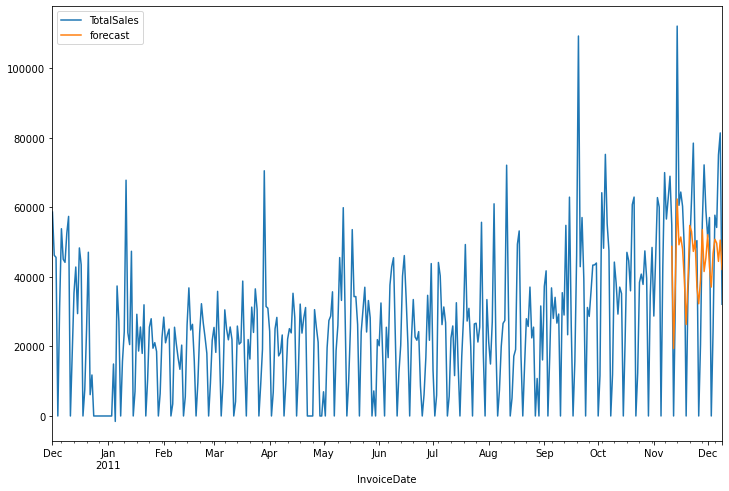

In [128]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df9['TotalSales'],order=(10, 1, 2),seasonal_order=(1,1,1,12))
results=model.fit()
df9['forecast']=results.predict(start=345,end=389,dynamic=True)
df9[['TotalSales','forecast']].plot(figsize=(12,8))

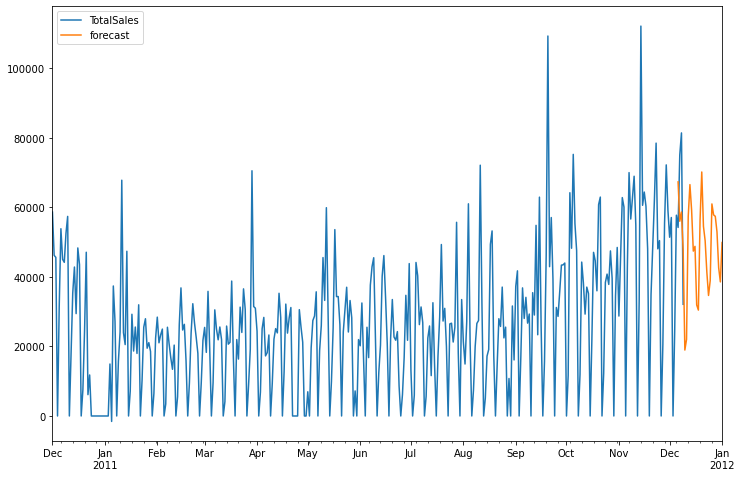

In [139]:
from pandas.tseries.offsets import DateOffset
future_dates=[df9.index[-1]+ DateOffset(days=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df9.columns)

future_datest_df.tail()

future_df=pd.concat([df9,future_datest_df])

future_df['forecast'] = results.predict(start = 370, end = 420, dynamic= True)
future_df[['TotalSales', 'forecast']].plot(figsize=(12, 8))

In [152]:
future_df

,TotalSales,Sales First Difference,Seasonal First Difference,forecast
2010-12-01,58635.56,NaN,NaN,NaN
2010-12-02,46207.28,-12428.28,NaN,NaN
2010-12-03,45620.46,-586.82,NaN,NaN
2010-12-04,0.00,-45620.46,NaN,NaN
2010-12-05,31383.95,31383.95,NaN,NaN
...,...,...,...,...
2011-12-28,NaN,NaN,NaN,57424.849752
2011-12-29,NaN,NaN,NaN,52957.549740
2011-12-30,NaN,NaN,NaN,42645.277579
2011-12-31,NaN,NaN,NaN,38564.053642


In [34]:
#building the model
from pyramid.arima import auto_arima
model = auto_arima(df9['TotalSales'], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df9['TotalSales'])

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

ModuleNotFoundError: No module named 'pyramid.arima'

In [13]:
squares = []

for i in range(0,9):
    square = i**2
    squares.append(square)
squares   

[0, 1, 4, 9, 16, 25, 36, 49, 64]

In [15]:
def square(num):
    square = num**2
    return square
square(7)

49

In [5]:
course= '''I love ML
 and love writing a code
 and love you'''
course

'I love ML\n and love writing a code\n and love you'

In [14]:
first ='Batka'
last ='Tseren'
msg = f'{first} {last} is a coder.'
print(msg)

Batka Tseren is a coder.


In [11]:
sec_num = 9

i = 0
j=3
while i < j:
    guess =int(input('Guess: '))
    i +=1
    if guess==sec_num:
        print('You won')
        break
else:
    print('You have failed')
    

   

Guess: 4
Guess: 5
Guess: 6
You have failed


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


df = pd.read_csv('Cleaned_Data.csv')
df.head()

,Unnamed: 0,InvoiceDate,Total_Price,year,month,day,week,weekday,dayofyear
0,2010-12-01,2010-12-01,58635.56,2010,12,1,48,2,335
1,2010-12-02,2010-12-02,46207.28,2010,12,2,48,3,336
2,2010-12-03,2010-12-03,45620.46,2010,12,3,48,4,337
3,2010-12-04,2010-12-04,0.00,2010,12,4,48,5,338
4,2010-12-05,2010-12-05,31383.95,2010,12,5,48,6,339


In [29]:
df1 = df.drop('Unnamed: 0', axis = 1).set_index('InvoiceDate')

In [30]:
df1.head()

,Total_Price,year,month,day,week,weekday,dayofyear
InvoiceDate,,,,,,,
2010-12-01,58635.56,2010,12,1,48,2,335
2010-12-02,46207.28,2010,12,2,48,3,336
2010-12-03,45620.46,2010,12,3,48,4,337
2010-12-04,0.00,2010,12,4,48,5,338
2010-12-05,31383.95,2010,12,5,48,6,339


In [33]:
#size = int(len(df1['Total_Price'])*0.8)
X = df.drop('Total_Price', axis =1)
y = df.Total_Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
#train, test = df1.Total_Price[0:size], df1.Total_Price[size:]
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.predict(model)

ValueError: could not convert string to float: '2011-09-26'